<a href="https://colab.research.google.com/github/sakshipatel2702/Machine_Learning/blob/main/Flower_Recognitoin_Sakshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Flower_Recognition_Sakshi_N01551583

/content/drive/MyDrive/Flower_Recognition_Sakshi_N01551583


In [4]:
train_flowerdata = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
flower_trainingset = train_flowerdata.flow_from_directory(
        'flower_trainingset',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 3587 images belonging to 5 classes.


In [5]:
test_flowerdata = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
flower_testset = test_flowerdata.flow_from_directory(
        'flower_testset',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 730 images belonging to 5 classes.


### Building Model with CNN

In [6]:
flower_cnn = tf.keras.models.Sequential()

### Building Convolution Layer for Flower Images

In [7]:
flower_cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
flower_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#### Note: To make your cnn model more accurate for the flower recognition run the above code atleast twice to give 2 layers.

In [8]:
flower_cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
flower_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
flower_cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
flower_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
flower_cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
flower_cnn.add(tf.keras.layers.Flatten())

In [12]:
flower_cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Note: The below line of code is for output layer and we are using units = 5 because we have 5 category that is Tulips, Rose, Dandelions, Daisy and Sunflower. And we have used activation='softmax' 

In [13]:
flower_cnn.add(tf.keras.layers.Dense(units=5 , activation='softmax'))

In [14]:
flower_cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [15]:
history = flower_cnn.fit(x = flower_trainingset , validation_data = flower_testset , epochs = 30)

Epoch 1/30
113/113 [==============================] - 745s 7s/step - loss: 1.3709 - accuracy: 0.3948 - val_loss: 1.0974 - val_accuracy: 0.5603
Epoch 2/30
113/113 [==============================] - 71s 631ms/step - loss: 1.1453 - accuracy: 0.5375 - val_loss: 1.0683 - val_accuracy: 0.5849
Epoch 3/30
113/113 [==============================] - 71s 625ms/step - loss: 1.0257 - accuracy: 0.5935 - val_loss: 0.9604 - val_accuracy: 0.6644
Epoch 4/30
113/113 [==============================] - 73s 644ms/step - loss: 0.9540 - accuracy: 0.6301 - val_loss: 0.9614 - val_accuracy: 0.6137
Epoch 5/30
113/113 [==============================] - 73s 648ms/step - loss: 0.8943 - accuracy: 0.6510 - val_loss: 0.8629 - val_accuracy: 0.6712
Epoch 6/30
113/113 [==============================] - 67s 591ms/step - loss: 0.8653 - accuracy: 0.6671 - val_loss: 0.8155 - val_accuracy: 0.6890
Epoch 7/30
113/113 [==============================] - 74s 647ms/step - loss: 0.8259 - accuracy: 0.6780 - val_loss: 0.8926 - val_accu

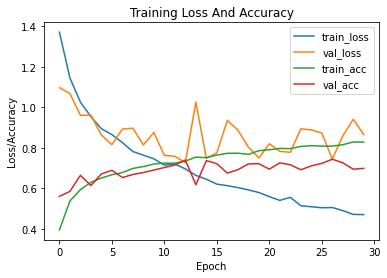

In [20]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title("Training Loss And Accuracy")
plt.legend()
plt.show()

In [21]:
test_flowerimg = load_img('/content/drive/MyDrive/Flower_Recognition_Sakshi_N01551583/flower_prediction/image24.jpg',target_size=(64,64))
test_flowerimg = image.img_to_array(test_flowerimg)
test_flowerimg = np.expand_dims(test_flowerimg,axis=0)
flower = flower_cnn.predict(test_flowerimg)
flower_trainingset.class_indices

1/1 [==============================] - 0s 27ms/step


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [22]:
print(flower)

[[0. 0. 0. 1. 0.]]


In [19]:
if flower[0][0]==1:
    print('The flower detected is Daisy!')
elif flower[0][1]==1:
    print('The flower detected is Dandelion!')
elif flower[0][2]==1:
    print('The flower detected is Rose!')
elif flower[0][3]==1:
    print('The flower detected is Sunflower!')
elif flower[0][4]==1:
    print("The flower detected is Tulip!")

The flower detected is Sunflower!
